# **Features from text**



**Learning objectives:**


In this chapter you will learn the following topics:

- Encoding text data using countvectorizer

- Encoding text data using Term Frequency and Inverted Document Frequency (TF-IDF)

- Multinomial Naive Bayes Classification using TF-IDF



**Technical Requirements**

In this chapter, you will use the following Python libraries:
* pandas,
* scikit-learn.

Install a jupyter-notebook along with these libraries. To understand this topic, you should have familiarity with the above-mentioned libraries.

__Introduction__

We need feature enginnering to convert text data into a set of representative numbers this process is called text mining(ex Sentiment Analysis).Once we have numbers, we are back in a  game of data anslysis, where machine learning algorithms can help us with classification and clustering.



**Example:**

Word counts is the one of the simplest method to encode text data.

**Recap ...**



```
A. Document - Document is a single piece of text information. It could be a tweet, text message, book, email etc.

B. Corpus - Corpus is a collection of documents. Simply, It's a list of text.

C. Token - Token is a word, symbols, or phrase derived from a document through the process called tokenization.
           For example, the document 'Tick the correct statement.' would have tokens of 'Tick', 'the', 'correct', and 'statement'.

```

_The process of assigning each unique number to each word is called tokenization._



In [ ]:
corpus = [
    'This is my pen.',
    'This is the first first document.',
    'Is this the my document?'
]


*We can construct a column representing the word "document," the word "first," the word "pen," and so on. Using Scikit-Learn's CountVectorizer():*

# **CountVectorizer**

CountVectorizer converts text documents collection to a matrix of token counts.The tokens can be individual words or arrays of two or more consecutive
words, that is, n-grams.




In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(corpus)
X

<3x7 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

*The result is a sparse matrix. The sparse matrix records the number of times each word appears.* Let's visualize the sparse matrix in the dataframe.

In [ ]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,document,first,is,my,pen,the,this
0,0,0,1,1,1,0,1
1,1,2,1,0,0,1,1
2,1,0,1,1,0,1,1


**Disadvantage of CountVectorizer**

* Raw word counts lead to features to put too much weight on words if they appear very frequently, which makes classification suboptimal.

**Do we have solutions?**
Yes, We do. We can fix this using **term frequency-inverse document frequency (TF–IDF)**. TF–IDF is a common term weighting scheme in information retrieval, that has also found good use in document classification.Which weights the word counts by a measure of how often they appear in the documents.

_In the following sections, we will further explain examples that illustrate how the tf-idfs is computed exactly and how the tf-idfs computed in scikit-learn’s TfidfTransformer and TfidfVectorizer._

# **TF-IDF**



tf stands for term-frequency,and tf-idf stands for (term-frequency)  *  (inverse document-frequency).

$ \text{tf-idf(t,d)}=\text{tf(t,d)} \times \text{idf(t)} $



Instead of looking at the raw counts of
each word in each document in a dataset, tf-idf looks at a normalized count
where each word count is divided by the number of documents this word appears
in.



$ tf(t, d) = (times ~word~ 't' ~ appears~ in~ document ~d) $

$ \text{tf-idf(t,d)} = tf(t, d) * N / ( documents ~ in ~ which ~ word ~ 't' ~ appears) $


$ N~$is the total number of documents in the dataset.

 The fraction $N / ( documents
...) $ is what’s known as the inverse document frequency $idf(t)$.

- If a word appears in
many documents, then its inverse document frequency is close to 1.

- If a words appears in just a few documents, then the inverse document frequency is much
higher.

Alternatively, we can take a log transform instead using the raw inverse
document frequency. Logarithm turns 1 into 0, and makes large numbers (those
much greater than 1) smaller. (More on this later.)


If we define tf-idf as:


$ \text{tf-idf(t,d)} = tf(t, d) * log (N /  documents~ in~ which ~word~ 't' ~appears) $
then a word that appears in every single document will be effectively zeroed out,
and a word that appears in very few documents will have an even larger count
than before.

_Tf-idf makes rare words more prominent and effectively ignores common words._

Visit this link to know more about TF-IDF in sklearn.
[TF-IDF](https://nlp.stanford.edu/IR-book/html/htmledition/tf-idf-weighting-1.html)

**TfidfTransformer**

Transform a count matrix to a normalized tf or tf-idf representation

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
vocabulary = ['document',	'first'	,'is'	,'my','pen'	,'the'	,'this']
pipe = Pipeline([('count', CountVectorizer(vocabulary=vocabulary)),
                 ('tfid', TfidfTransformer())]).fit(corpus)
pipe['count'].transform(corpus).toarray()

array([[0, 0, 1, 1, 1, 0, 1],
       [1, 2, 1, 0, 0, 1, 1],
       [1, 0, 1, 1, 0, 1, 1]])

In [ ]:
pipe['tfid'].idf_

array([1.28768207, 1.69314718, 1.        , 1.28768207, 1.69314718,
       1.28768207, 1.        ])

In [ ]:
pd.DataFrame(pipe.transform(corpus).toarray(), columns=vec.get_feature_names()) # vec is used in countvectoriser

,document,first,is,my,pen,the,this
0,0.000000,0.000000,0.391484,0.504107,0.66284,0.000000,0.391484
1,0.314319,0.826584,0.244097,0.000000,0.00000,0.314319,0.244097
2,0.487591,0.000000,0.378658,0.487591,0.00000,0.487591,0.378658



**TfidfVectorizer**

As tf–idf is very often used for text features, there is also another class called TfidfVectorizer that combines all the options of CountVectorizer and TfidfTransformer in a single model:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(corpus)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,document,first,is,my,pen,the,this
0,0.000000,0.000000,0.391484,0.504107,0.66284,0.000000,0.391484
1,0.314319,0.826584,0.244097,0.000000,0.00000,0.314319,0.244097
2,0.487591,0.000000,0.378658,0.487591,0.00000,0.487591,0.378658


*Each row is normalized to have unit Euclidean norm.*

***The best way to adjust the feature extraction parameters is to use a cross-validated grid search, for instance by pipelining the feature extractor with a classifier:***

**An example of using TF-IDF in a classification problem use Naive Bayes Classification.**

# **Multinomial Naive Bayes Classification**


"Multinomial Naive Bayes models the distribution of
words in a document as a multinomial. A document is
treated as a sequence of words and it is assumed that
each word position is generated independently of every
other." [Tackling the Poor Assumptions of Naive Bayes Text Classifiers
](https://people.csail.mit.edu/jrennie/papers/icml03-nb.pdf)

_In this example we consider a multiclass text classification problem based on the 20 newsgroups dataset which contains the text of nearly 20,000 newsgroup posts partitioned across 20 different newsgroups._

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

_Load the filenames and data from the 20 newsgroups dataset (classification)._

In [ ]:
data = fetch_20newsgroups()

_Print names of 20 class (target names )__

In [ ]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

_Select some categories from target names and collect train/test data._

In [ ]:
cat = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics'] # from data.target_names

_From sklearn Python package, we load the training and test data using the 60/40% “by date” split which makes our results comparable to existing published work._

In [ ]:
train = fetch_20newsgroups(subset='train', categories=cat) # collect train data from fetch_20newsgroups datset
test = fetch_20newsgroups(subset='test', categories=cat)  # collect test data from fetch_20newsgroups dataset

_Make a pipeline of 'TfidfVectorizer', and 'MultinomialNB'._

In [ ]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB()) # make pipeline of TfidfVectorizer and Multinomial Naive Bayes

_Fit and predict data._

In [ ]:
model.fit(train.data, train.target) # fit data
labels = model.predict(test.data) # predict test data

_Create confusion matrix to visualise performance and accuracy of model._

Text(91.68, 0.5, 'Predicted')

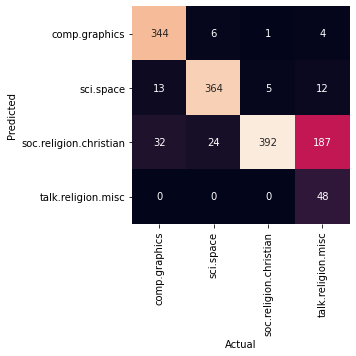

In [ ]:
mat = confusion_matrix(test.target, labels) # create confusion matrix to see model performance
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('Actual')
plt.ylabel('Predicted')

_create a function to predict category of input text._

In [ ]:
def predict_category(data, train=train, model=model):
    pred = model.predict([data]) # predict data
    return train.target_names[pred[0]] # find target name

_Predict category._

In [ ]:
predict_category('discussing christianity vs islam') # function call to determine class of given text


'soc.religion.christian'

In [ ]:
predict_category('determining the screen refresh rate')


'comp.graphics'

**Optional**

**The Bag of Words representation**

Machine learning algorithms expect numerical feature vectors with a fixed size rather than the raw text documents with variable length. So the raw data (a sequence of symbols) cannot be fed directly to the ML algorithms. To cope with this problem, i.e., to extract numerical features from text content we use:

* **tokenizing** strings and giving an integer id for each possible token, for instance, by using white-spaces and punctuation as token separators.

* **counting** the occurrences of tokens in each document.

* **normalizing** and weighting with diminishing importance tokens that occur in the majority of samples/documents.

**Features and Samples:**

* Individual token occurrence frequency - **feature**

* The vector of the token frequencies for a given document - **sample**


**Vectorization** is the process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting, and normalization) is called the *Bag of Words.*

A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.

**Stop words**

Stop words are words like “and”, “the”, “him”, which are presumed to be uninformative in representing the content of a text, and which may be removed to avoid them being construed as signal for prediction.

# **Key take away**

- Word counts is the one of the simplest method to enccode text data.

- CountVectorizer converts text documents collection to a matrix of token counts.

- tf stands for term-frequency,and tf-idf stands for (term-frequency)  *  (inverse document-frequency).

$$ \text{tf-idf(t,d)}=\text{tf(t,d)} \times \text{idf(t)} $$

- Machine learning algorithms expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

- to extract numerical features from text content we use: tokenizing,counting, and normalizing.